In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

In [2]:
x_train=pd.read_csv('Logistic_X_Train.csv')
y=pd.read_csv('Logistic_Y_Train.csv')
y_train=y.values.ravel()
x_test=pd.read_csv('Logistic_X_Test.csv')
print('Training data',x_train.head(),x_train.shape,y.head(),y.shape,'Testing data',x_test.head(),x_test.shape,sep='\n\n')

Training data

         f1        f2        f3
0 -1.239375  0.749101 -0.528515
1 -1.036070  0.801436 -1.283712
2 -0.615579  1.579521 -1.391927
3  1.335978  1.348651  1.433564
4  0.658925  1.300019  0.571603

(3000, 3)

   label
0      1
1      1
2      1
3      0
4      0

(3000, 1)

Testing data

         f1        f2        f3
0 -0.767508 -0.261859 -2.514831
1 -1.241653  1.449001 -0.413089
2  1.925270  1.931761  1.342619
3 -1.298255  1.049761 -0.527319
4 -0.964712  0.938088 -1.186328

(1000, 3)


In [3]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
coeff=lr.coef_
intercept=lr.intercept_
print('Coefficient',coeff,'Intercept',intercept,sep='\n')

Coefficient
[[-3.92798396  3.10147056 -2.28040541]]
Intercept
[-4.27017148]


In [5]:
y_pred=lr.predict(x_test)
class0=x_test.loc[(y_pred==0)]
class1=x_test.loc[(y_pred==1)]
print(y_pred,y_pred.shape,sep="\n\n")

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 

In [6]:
y_pred=pd.DataFrame(y_pred,columns=["label"])
y_pred

,label
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


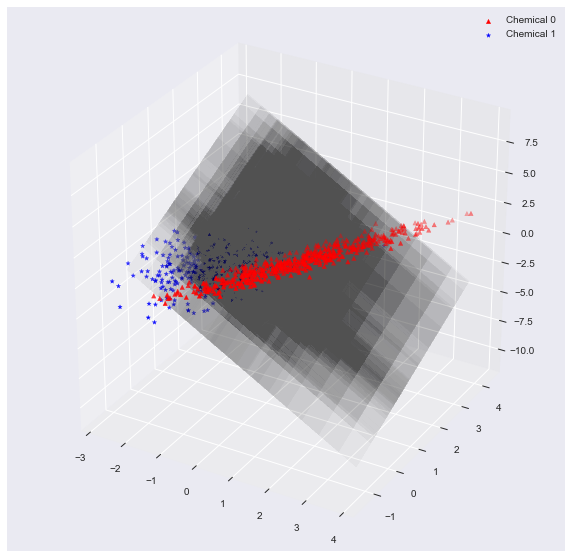

In [7]:
fig = plt.figure(figsize=(10,10))
axs=plt.axes(projection='3d')
x=x_test['f1']
y=x_test['f2']
xx,yy=np.meshgrid(x,y)
z=-((coeff[0][1]*yy+coeff[0][0]*xx+intercept)/coeff[0][2])
axs.scatter3D(class0['f1'],class0['f2'],class0['f3'],label='Chemical 0',color='red',marker='^')
axs.scatter3D(class1['f1'],class1['f2'],class1['f3'],label='Chemical 1',color='blue',marker='*')
axs.plot_surface(xx,yy,z,alpha=0.01,color='gray')
axs.legend(fontsize=10)

In [8]:
print('Accuracy of the model\n',lr.score(x_train,y_train))

Accuracy of the model
 0.9953333333333333


In [9]:
y_pred.to_csv('Predicted_data.csv')